In [3]:
import numpy as np
import pandas as pd
%matplotlib inline


import numpy as np

import pandas as pd
import numpy as np
import  seaborn as sns
import rwi as rwi
import math
import  seaborn as sns
from matplotlib import pyplot as plt
import hurst
import statsmodels.api as sm

In [4]:
import FinanceDataReader as fdr

In [3]:
btc = fdr.DataReader('EUR/USD', '2016-01-01')

C:\Users\lexik\.conda\envs\quant\lib\site-packages\FinanceDataReader\investing\data.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(jo['quotes'])


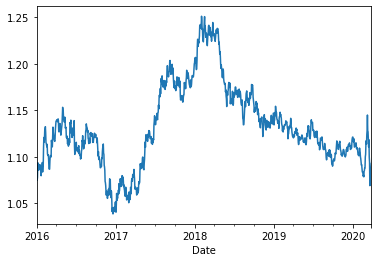

In [4]:
btc.Close.plot()

In [43]:
rwi.hurstF(btc.loc['2016-01-01':][['Close']])

array([0.42183802])

In [124]:
result = []
for i in range(1, 50):
    result.append(rwi.Momersion(btc.loc['2016-01-01':]['Close'].pct_change(i).fillna(0)))

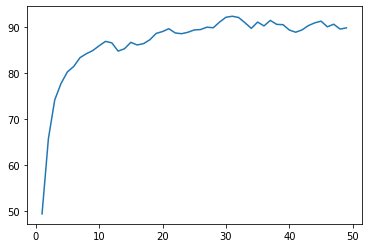

In [125]:
plt.plot([i for i in range(1,50)], result[:50])

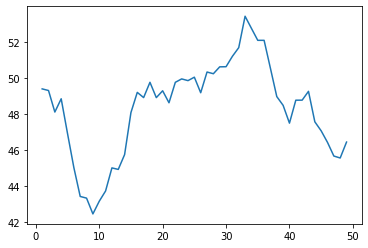

In [127]:
result = []
for i in range(1, 50):
    result.append(rwi.momersionPeriod(btc.loc['2016-01-01':]['Close'], i))
plt.plot([i for i in range(1,50)], result[:50])

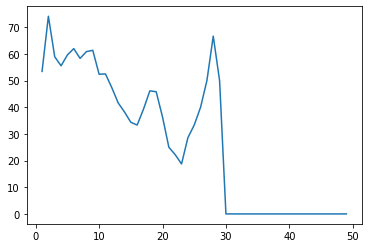

In [32]:
result = []
for i in range(1, 50):
    result.append(rwi.momersionPeriod(btc.loc['2020-01-01':]['Close'], i))
plt.plot([i for i in range(1,50)], result[:50])

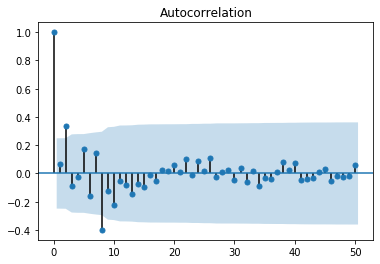

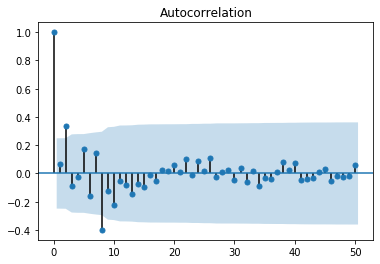

In [79]:
sm.graphics.tsa.plot_acf(pd.Series(btc.loc['2020-01-01':].Close.pct_change()).fillna(0).fillna(0), lags=50)

In [65]:
# because momentums high periods are auto-correlated then long-term MAs and momentum strategy should work

In [84]:
## random

In [85]:
btc.shape

(1105, 5)

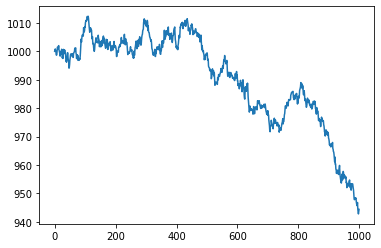

In [90]:
win = 50
persistent = hurst.random_walk(1000, proba=0.50, min_lookback=win, max_lookback=win)
plt.plot(1000+pd.Series(persistent))

In [94]:
tmp = pd.DataFrame(persistent, columns=['Close'])

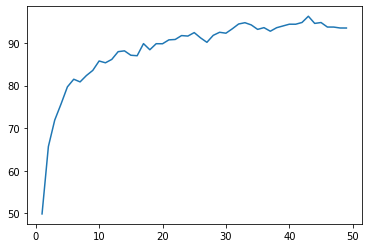

In [156]:
result = []
for i in range(1, 50):
    result.append(rwi.Momersion(tmp['Close'].pct_change(i).fillna(0)))
plt.plot([i for i in range(1,50)], result[:50])

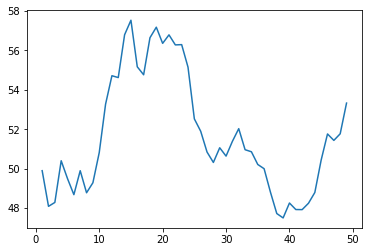

In [154]:
result = []
for i in range(1, 50):
    result.append(rwi.momersionPeriod(tmp['Close'], i))
plt.plot([i for i in range(1,50)], result[:50])

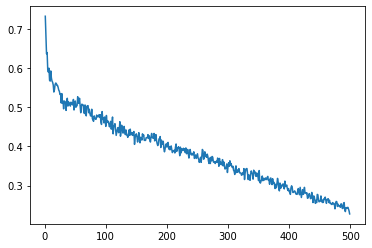

In [158]:
result = []
for i in range(1, 500):
    result.append(rwi.marketMeannes(tmp['Close'].pct_change(i).fillna(0)))
plt.plot([i for i in range(1,500)], result[:500])

In [105]:
tmp = (100.0 + tmp)

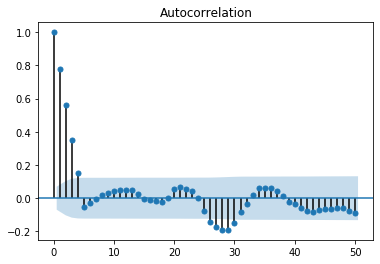

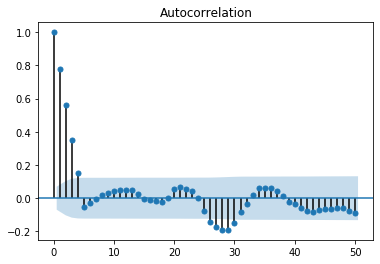

In [149]:
sm.graphics.tsa.plot_acf(pd.Series(tmp.iloc[0:800].Close.pct_change(5)).fillna(0).fillna(0), lags=50)

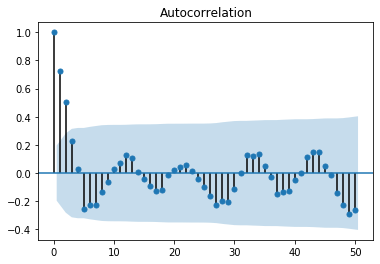

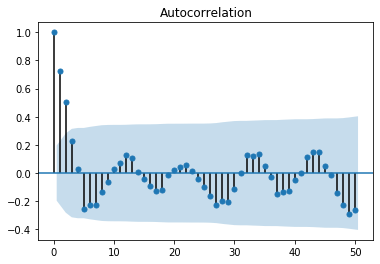

In [150]:
sm.graphics.tsa.plot_acf(pd.Series(tmp.iloc[900:].Close.pct_change(5)).fillna(0).fillna(0), lags=50)

In [164]:
eurusd = pd.read_csv('data/eurusd_5min.csv')

In [5]:
def load_df(name):
    eurusd_df = pd.read_csv(name)
    eurusd_df = eurusd_df.rename(columns={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<TIME>':'Time', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
    eurusd_df[['Date']] = pd.to_datetime(eurusd_df['Date'].astype('str'), yearfirst=True)
    eurusd_df =eurusd_df.sort_values(by=['Date', 'Time'])
    eur_df = eurusd_df[['Date', 'Time', 'Close']].rename(columns={'Close':'price'})
    eur_df['returns'] = eur_df['price'].pct_change()
    eur_df.dropna(inplace=True)
    #eur_df = eur_df[eur_df.Date>'2020-01-01']
    eur_df = eur_df.set_index('Date')
    return eur_df

In [45]:
name='data/eurusd_5min.csv'
eur_df = load_df(name)

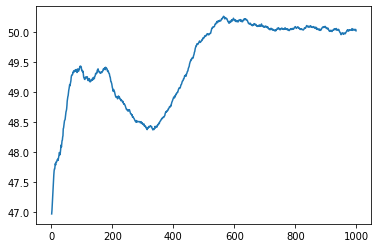

In [46]:
result = []
for i in range(1, 1000):
    result.append(rwi.momersionPeriod(eur_df.price, i))
plt.plot([i for i in range(1,1000)], result[:1000-1])

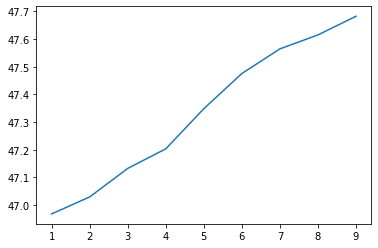

In [47]:
plt.plot([i for i in range(1,10)], result[:10-1])

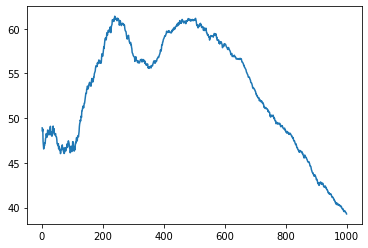

In [48]:
result = []
for i in range(1, 1000):
    result.append(rwi.momersionPeriod(eur_df.loc['2020-01-01':].price, i))
plt.plot([i for i in range(1,1000)], result[:1000-1])

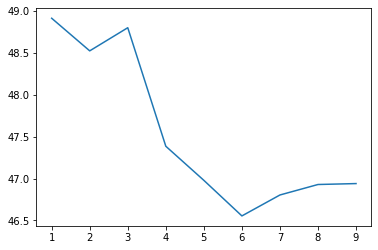

In [49]:
plt.plot([i for i in range(1,10)], result[:10-1])

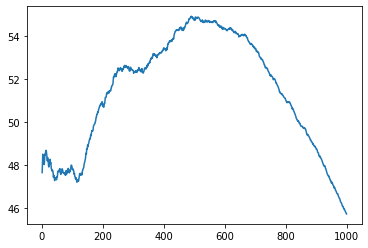

In [50]:
result = []
for i in range(1, 1000):
    result.append(rwi.momersionPeriod(eur_df.loc['2019-01-01':].price, i))
plt.plot([i for i in range(1,1000)], result[:1000-1])

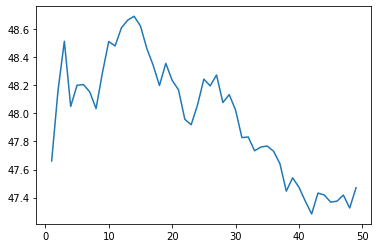

In [51]:
plt.plot([i for i in range(1,50)], result[:50-1])

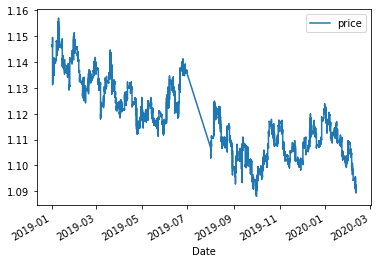

In [52]:
eur_df.loc['2019-01-01':][['price']].plot()

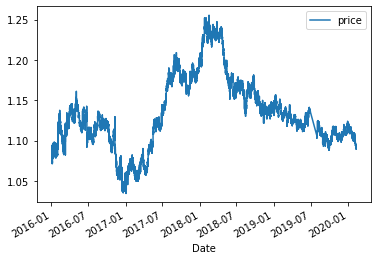

In [53]:
eur_df.loc['2016-01-01':][['price']].plot()

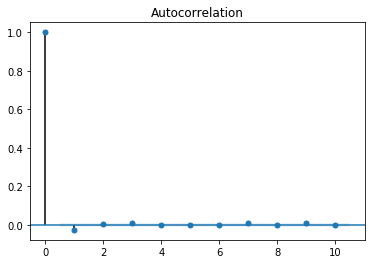

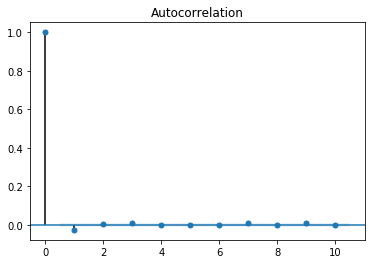

In [58]:
sm.graphics.tsa.plot_acf(pd.Series(eur_df.loc['2019-01-01':].price.pct_change()).fillna(0).fillna(0), lags=10)

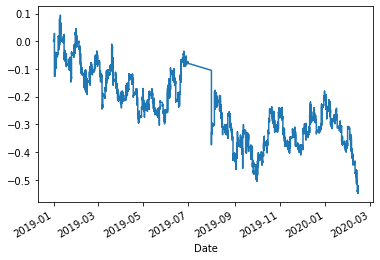

In [20]:
eur_df.loc['2019-01-01':].price.pct_change(10).cumsum().plot()